From sklearn.datasets load digits dataset and do following

1.Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv

2.Plot confusion matrix

3.Plot classification report

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
df = pd.DataFrame(digits.data, digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
df["target"] = digits.target

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
# create X and y
X = df.drop("target", axis= "columns")
y = df.target

In [11]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [12]:
# splitting
from sklearn.model_selection import train_test_split


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

In [15]:
len(X_train)

1437

In [16]:
len(X_test)

360

# Create classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier


In [24]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9888888888888889

k = 3 gives the best score

plotting confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 38]], dtype=int64)

Text(0.5, 24.0, 'Truth')

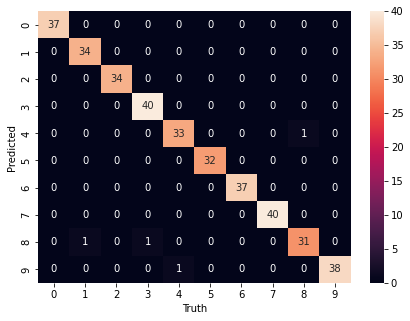

In [27]:
# visualize using seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
plt.figure(figsize= (7,5))
sn.heatmap(cm, annot= True)
plt.ylabel("Predicted")
plt.xlabel("Truth")

classification report

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       1.00      1.00      1.00        34
           3       0.98      1.00      0.99        40
           4       0.97      0.97      0.97        34
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.97      0.94      0.95        33
           9       1.00      0.97      0.99        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

